# Histogram Equalization

# Introduction
In this lab experiment we will be implementing Histogram Equalization. Histogram Equalization is a computer image processing technique used to improve the contrast in an image.

# Method
Histogram Equalization improves contrast by spreading out the most frequent values. This increases the gobal contrast of an image.

In [1]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import os, os.path
import glob
from copy import deepcopy, copy

In [2]:
ima = []
for filename in glob.glob('imagesHW8/*.jpg'): #assuming gif
    im = Image.open(filename)
    im = im.convert('L')
    ima.append(im)

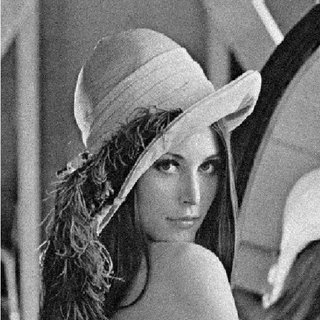

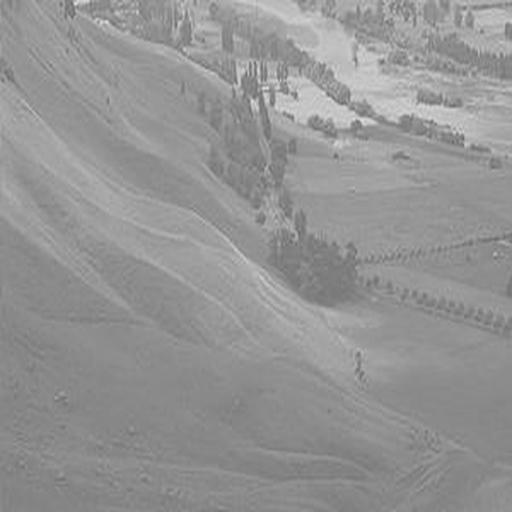

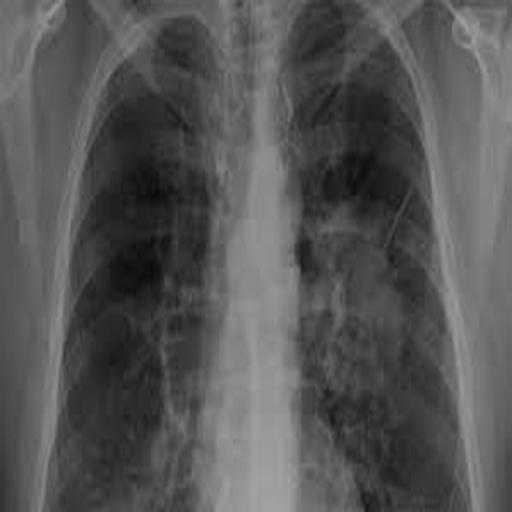

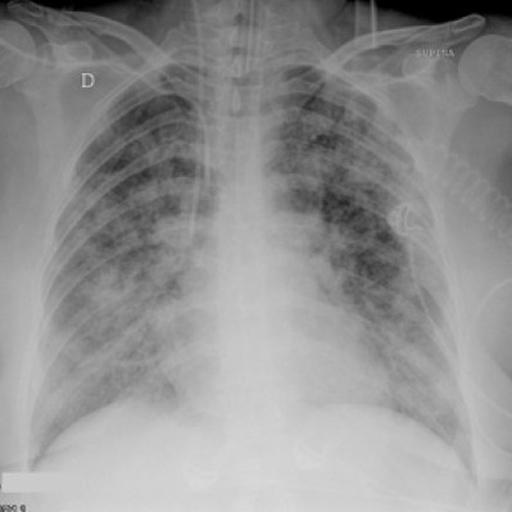

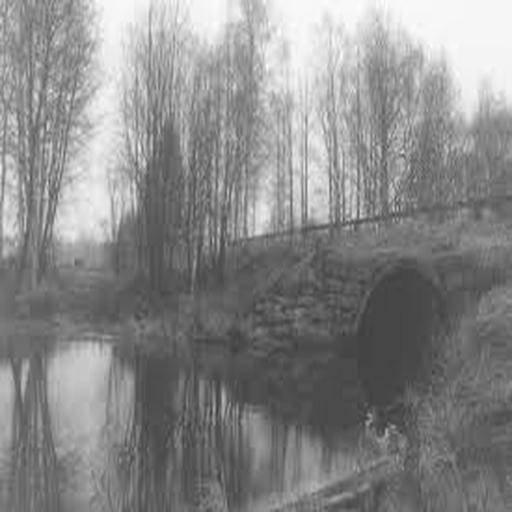

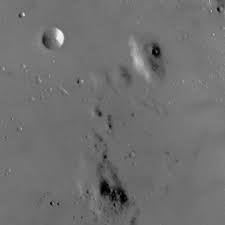

In [3]:
for i in range(len(ima)):
    display(ima[i])

In [4]:
# for i in range(len(ima)):
#     img = ima[i].resize((512,512), Image.ANTIALIAS)
#     img.save("imagesHW7/image" + str(i+10) + ".jpg") 

In [5]:
test = np.asarray(ima[2])

In [6]:
#turns the 2D pixel to a 1D array of pixels
flat = test.flatten()

(array([ 1901., 12551., 36668., 42549., 39450., 38903., 35900., 27585.,
        20468.,  6169.]),
 array([  6. ,  21.7,  37.4,  53.1,  68.8,  84.5, 100.2, 115.9, 131.6,
        147.3, 163. ]),
 <a list of 10 Patch objects>)

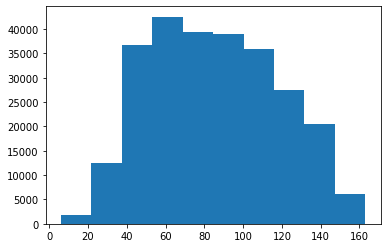

In [7]:
#image histogram
plt.hist(flat)

In [8]:
# formula for creating the histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))
test[0].dtype

<IPython.core.display.Math object>

dtype('uint8')

In [9]:
def create_histogram(image, bins):
    #pixel range ex:1-256
    np_arr = np.asarray(image)
    flat = np_arr.flatten()
    histogram = np.zeros(bins)
    
    for pixel in flat:
        histogram[pixel] += 1
    
    return flat, histogram

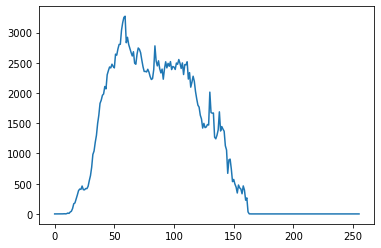

In [10]:
flat, hist = create_histogram(ima[2], 256)
plt.plot(hist)

In [11]:
def cumulative_sum(histogram):
    histogram = iter(histogram)
    b = [next(histogram)]
    for i in histogram:
        b.append(b[-1] + i)
    return np.array(b)

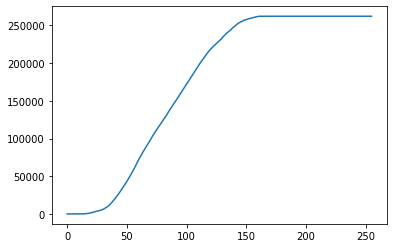

In [12]:
csum = cumulative_sum(hist)
plt.plot(csum)

In [13]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

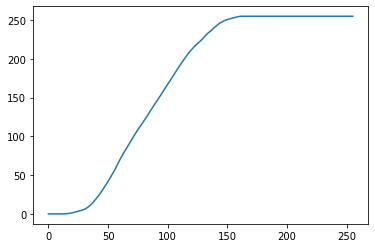

In [14]:
nj = (csum - csum.min()) * 255
N = csum.max() - csum.min()

csum_normalize = nj/N

plt.plot(csum_normalize)

In [15]:
csum_normalize = csum_normalize.astype('uint8')

(array([6044., 3979., 6257., 3841., 6159., 4670., 4844., 4915., 5057.,
        5354., 5608., 6200., 3250., 6100., 5724., 5406., 5294., 4967.,
        5385., 5388., 4981., 4713., 7085., 4494., 4625., 5310., 4980.,
        4734., 4623., 4916., 7347., 4906., 4866., 4884., 5027., 4897.,
        7270., 4981., 4567., 4274., 6493., 5469., 6120., 4343., 5160.,
        5846., 4380., 5586., 5398., 5427.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

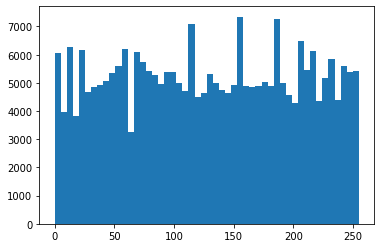

In [16]:
equalize_img = csum_normalize[flat]
plt.hist(equalize_img, bins=50)

In [17]:
equalize_img = np.reshape(equalize_img, ima[2].size)

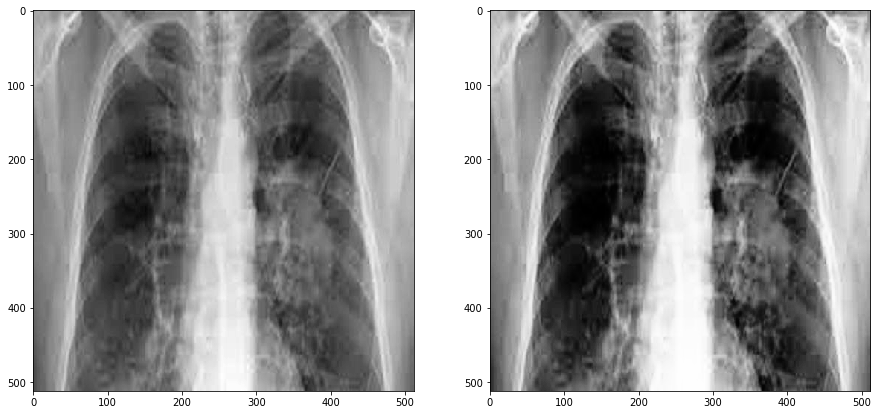

In [18]:

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(ima[2], cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(equalize_img, cmap='gray')

plt.show(block=True)

In [19]:
def equalize(image, bins):
    flat,hist = create_histogram(image, bins)
    #plt.hist(flat), plt.plot(hist)
    csum = cumulative_sum(hist)
    #plt.plot(csum)
    nj = (csum - csum.min()) * 255
    N = csum.max() - csum.min()
    csum_normalize = nj / N
    #plt.plot(csum_normalize)
    csum_normalize = csum_normalize.astype('uint8')
    equalize_img = csum_normalize[flat]
    #plt.hist(equalize_img, bins=50)
    equalize_img = np.reshape(equalize_img, image.size)
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)

    fig.add_subplot(1,2,1)
    plt.imshow(image, cmap='gray')

    # display the new image
    fig.add_subplot(1,2,2)
    plt.imshow(equalize_img, cmap='gray')

    plt.show(block=True)

# Results
Here we can see different images and we can see that the contrast has improve in some and some looks about similar.

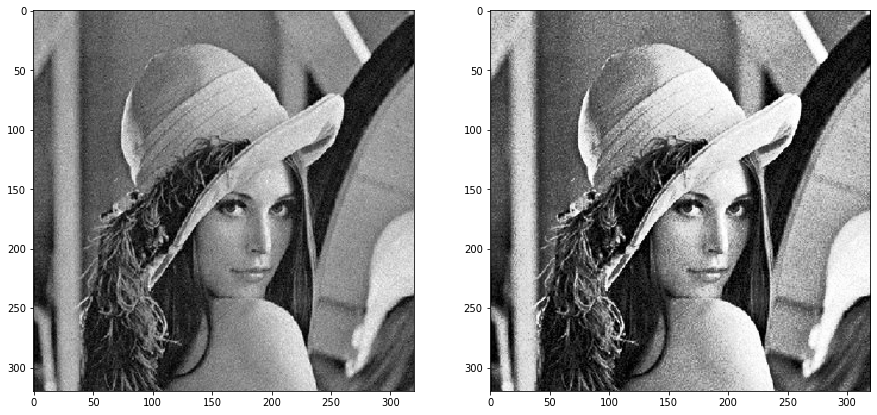

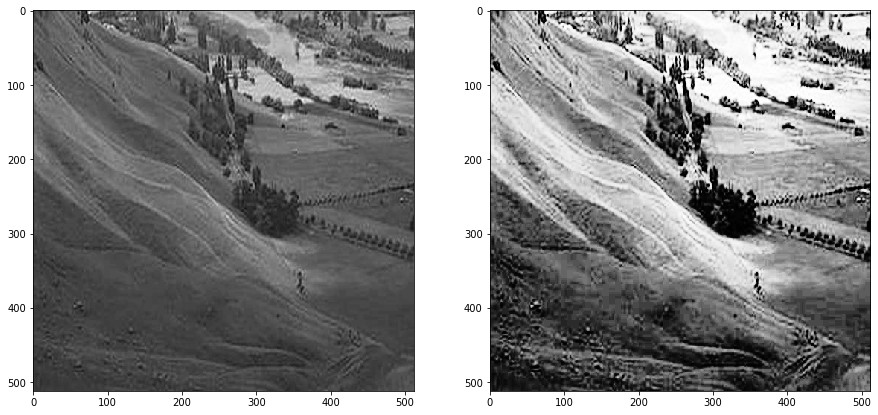

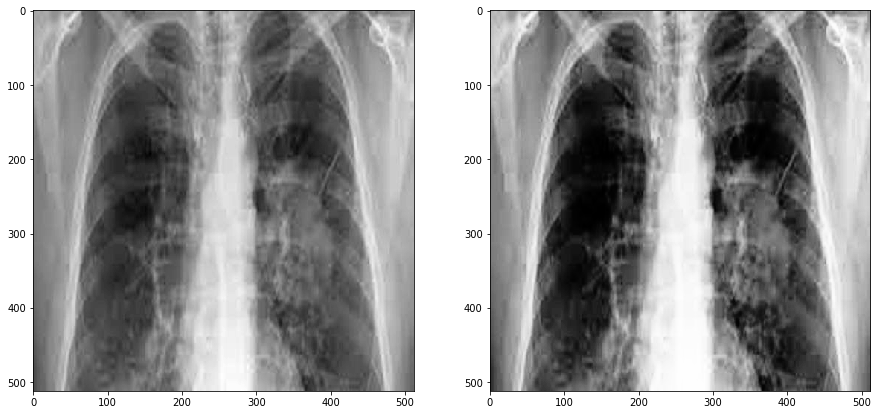

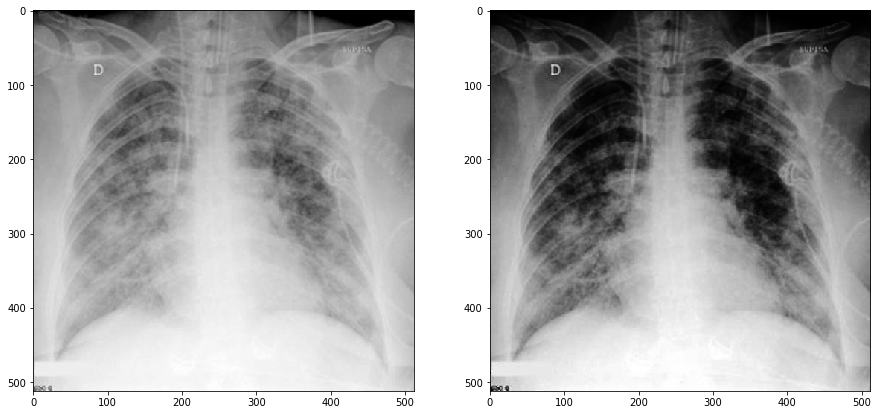

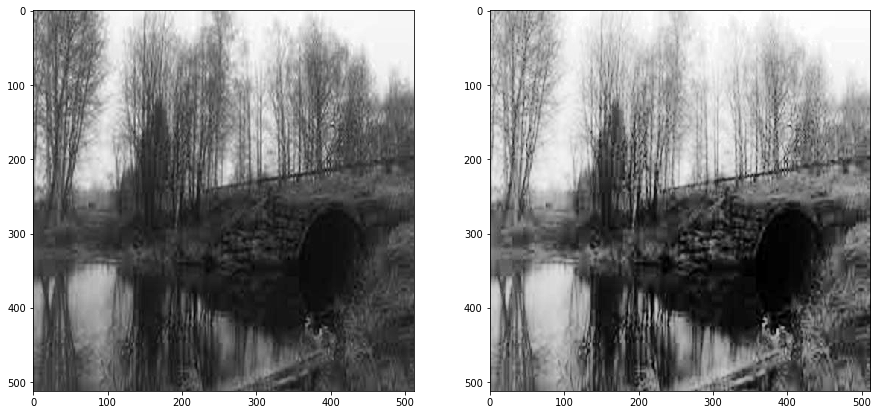

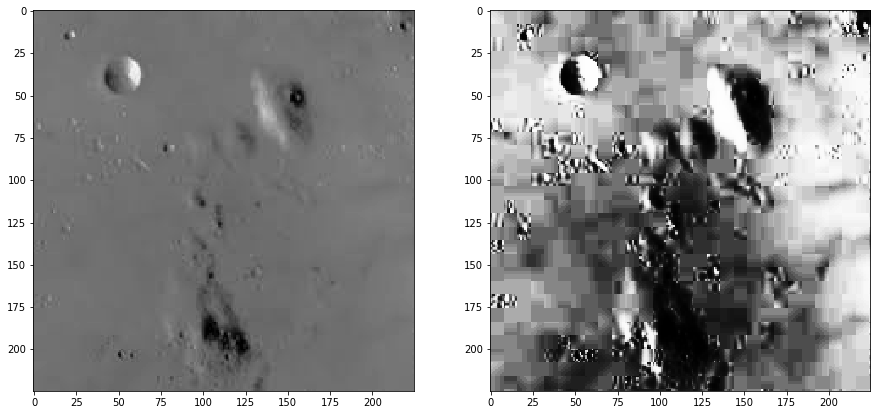

In [20]:
for i in range(len(ima)):
    equalize(ima[i], 256)

# Conclusion
Histogram Equalization is a very interesting topic for image processing because it helps improve picture quality without much work. It is specially very useful for X-ray images as it may help see anomalies easier with it but it can also hide anomalies if not used careully as you might wipe out the anomaly.